Esta é uma análise feita com base nos microdados do enem 2019 disponibilizados pelo INEP. A amostra utilizada contém 500 mil candidatos (cerca de 10%).

#Bibliotecas

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Processamento e Limpeza de Dados

In [108]:
dados = pd.read_csv('gdrive/MyDrive/Análise de dados/ENEM 2019/enem2019.csv',delimiter=';')
dados

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,"1,90002E+11",2019,5300108,Brasília,53,DF,17.0,M,1,2,1,5300108.0,Brasília,53.0,DF,2,0,2,NaN,0,53006739.0,5300108.0,Brasília,53.0,DF,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBBAEDCDBAAADBDEAEDBDABCEBDBBCBBDCDABDDCBBEE,EBCAD99999CDCDCAEDEDAABDEDCDDECBEAABDCDABCCCEC...,BBCECBABEACBBEADEABBCDDABBECDDACBDDEBBBDCEEDA,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,140.0,120.0,160.0,120.0,120.0,660.0,F,F,F,D,3,E,A,B,C,B,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B
1,"1,90001E+11",2019,1505304,Oriximiná,15,PA,24.0,M,1,1,1,1505106.0,Óbidos,15.0,PA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,B,1,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A
2,"1,90001E+11",2019,2304400,Fortaleza,23,CE,19.0,M,1,3,1,2304400.0,Fortaleza,23.0,CE,2,0,2,1.0,0,23073918.0,2304400.0,Fortaleza,23.0,CE,2.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,...,DEABAAAECECADCAAEABDCDEBDCEBABCDDACCEAEDAABAE,DCCEC99999CDBBDCDCCDACABCBDBEAEECBDDBDACEBBACA...,BAECBACBDACCADDEBBCABEBDABCDACCDCADAAECABBADA,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,100.0,40.0,60.0,60.0,20.0,280.0,H,H,B,B,3,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
3,"1,90001E+11",2019,2602704,Buenos Aires,26,PE,20.0,F,1,3,1,2609501.0,Nazaré da Mata,26.0,PE,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CECABECABABCECCEACCDEAECEDBDBADBAAABBBEABECBD,ABDBC99999BCBEBEDBCBAEBEBACCEBDCEBABEBDADDADBC...,EBADBBCCACDABDEBABBCBBDACDAECEBBEECABBCBECDEC,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,120.0,120.0,100.0,580.0,B,E,A,A,5,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,"1,90001E+11",2019,2307007,Jaguaruana,23,CE,17.0,M,1,3,1,2307007.0,Jaguaruana,23.0,CE,2,0,2,1.0,0,23127430.0,2307007.0,Jaguaruana,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,F,F,3,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,"1,90002E+11",2019,4127965,Turvo,41,PR,17.0,M,1,1,1,4127965.0,Turvo,41.0,PR,2,0,2,1.0,0,41152719.0,4127965.0,Turvo,41.0,PR,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,AADACADBEEDEDCBCCEAEBCADAACBEDCDCCCDBCBBAEACD,99999DCBADABEBDCEDCEBEDBADCBAEDDDBAEDEDACDEBDC...,CDBABBBBABDCCDEACECDADDCBBDCBDDEECEBCDCCCCBCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDAD

Nesta tabela há 136 colunas, mas somente algumas serão analisadas aqui.

In [109]:
manter = ['NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_ESCOLA','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_LINGUA','NU_NOTA_REDACAO','Q001','Q002','Q005','Q006','Q024','Q025']
dados = dados[manter]
dados.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q024,Q025
0,Brasília,DF,17.0,M,2,2,0,5202.0,5457.0,571.0,4683.0,0,660.0,F,F,3,E,B,B
1,Oriximiná,PA,24.0,M,1,1,0,NaN,NaN,NaN,NaN,1,NaN,B,C,1,B,A,A
2,Fortaleza,CE,19.0,M,3,2,0,4268.0,4632.0,4677.0,4425.0,0,280.0,H,H,3,B,A,A
3,Buenos Aires,PE,20.0,F,3,1,0,494.0,4949.0,5111.0,4816.0,0,580.0,B,E,5,B,A,B
4,Jaguaruana,CE,17.0,M,3,2,0,NaN,NaN,NaN,NaN,0,NaN,E,E,3,B,A,A


Pela amostra é possível ver vários valores NaN (indefinidos). A tabela abaixo mostra quantos destes valores existem em cada coluna.

In [110]:
sem_dado = dados.isna().sum().sort_values(ascending=False)
sem_dado

NU_NOTA_CN                 117729
NU_NOTA_MT                 117729
NU_NOTA_LC                  98098
NU_NOTA_REDACAO             98098
NU_NOTA_CH                  98098
NU_IDADE                        4
SG_UF_RESIDENCIA                0
TP_SEXO                         0
TP_COR_RACA                     0
TP_ESCOLA                       0
IN_TREINEIRO                    0
Q025                            0
Q024                            0
TP_LINGUA                       0
Q001                            0
Q002                            0
Q005                            0
Q006                            0
NO_MUNICIPIO_RESIDENCIA         0
dtype: int64

Vemos que praticamente todos os valores indefinidos são referentes à notas. Estes valores são indefinidos porque não existem, são notas dos alunos que faltaram no dia das provas. A quantidade de notas faltantes na área de ciências da natureza e matemática são iguais, pois as provas foram aplicadas no mesmo dia. As outras notas faltantes são iguais entre si, pois as provas foram aplicadas no mesmo dia. As quantidades não são todas iguais porque alguns candidatos foram somente em um dia.

Todos os dados dos alunos que faltaram serão removidos para que não haja nenhuma discrepância.

In [111]:
dados = dados.dropna(subset=['NU_NOTA_MT', 'NU_NOTA_REDACAO'])
sem_dado = dados.isna().sum().sort_values(ascending=False)
sem_dado

NU_IDADE                   3
Q025                       0
NU_NOTA_CH                 0
SG_UF_RESIDENCIA           0
TP_SEXO                    0
TP_COR_RACA                0
TP_ESCOLA                  0
IN_TREINEIRO               0
NU_NOTA_CN                 0
NU_NOTA_LC                 0
Q024                       0
NU_NOTA_MT                 0
TP_LINGUA                  0
NU_NOTA_REDACAO            0
Q001                       0
Q002                       0
Q005                       0
Q006                       0
NO_MUNICIPIO_RESIDENCIA    0
dtype: int64

Percebe-se que ainda há três valores indefinidos. Como eles são poucos, não há necessidade de remover estes candidatos dos dados. Estes valores são referentes à idade. Eles serão substituidos pela média das idades de todos os candidatos.

In [112]:
dados = dados.fillna(value=np.mean(dados['NU_IDADE']))
sem_dado = dados.isna().sum().sort_values(ascending=False)
sem_dado


Q025                       0
NU_NOTA_CH                 0
SG_UF_RESIDENCIA           0
NU_IDADE                   0
TP_SEXO                    0
TP_COR_RACA                0
TP_ESCOLA                  0
IN_TREINEIRO               0
NU_NOTA_CN                 0
NU_NOTA_LC                 0
Q024                       0
NU_NOTA_MT                 0
TP_LINGUA                  0
NU_NOTA_REDACAO            0
Q001                       0
Q002                       0
Q005                       0
Q006                       0
NO_MUNICIPIO_RESIDENCIA    0
dtype: int64

Vemos que agora não há nenhum valor indefinido. Abaixo está uma amostra da tabela.

In [ ]:
dados

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q024,Q025
0,Brasília,DF,17.0,M,2,2,0,5202.0,5457.0,571.0,4683.0,0,660.0,F,F,3,E,B,B
2,Fortaleza,CE,19.0,M,3,2,0,4268.0,4632.0,4677.0,4425.0,0,280.0,H,H,3,B,A,A
3,Buenos Aires,PE,20.0,F,3,1,0,494.0,4949.0,5111.0,4816.0,0,580.0,B,E,5,B,A,B
5,Recife,PE,17.0,F,1,1,0,5921.0,5235.0,5803.0,4344.0,0,940.0,B,C,3,C,B,B
6,Porto Alegre,RS,20.0,M,1,1,0,4785.0,5224.0,5651.0,4621.0,1,760.0,E,E,3,G,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,Barreiros,PE,17.0,M,3,2,0,4633.0,5474.0,3928.0,5509.0,1,940.0,E,E,4,E,A,B
499994,Rio Bonito,RJ,25.0,F,3,1,0,4013.0,4279.0,5167.0,4058.0,1,460.0,A,B,2,B,B,B
499995,Turvo,PR,17.0,M,1,2,0,4989.0,4248.0,4617.0,6287.0,1,600.0,E,E,3,C,A,B
499996,Itaberaba,BA,19.0,F,1,1,0,3908.0,375.0,5097.0,523.0,0,520.0,B,B,3,C,A,B


Nesta tabela, contendo 381652 candidatos, podemos observar que muitas notas tem valor acima de 3 mil. Isto está claramente errado, pois as notas vão de 0 à 1000. Abaixo está uma tabela mostrando quantas notas acima de 1000 existem em cada área.

In [113]:
notas = ['NU_NOTA_CN','NU_NOTA_CH',"NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]

for nota in notas:
  print(nota,dados[dados[nota]>1000][nota].count())

NU_NOTA_CN 343273
NU_NOTA_CH 343359
NU_NOTA_LC 343408
NU_NOTA_MT 343294
NU_NOTA_REDACAO 0


Vemos que a grande maioria está com valor errado, portanto deve ser um erro de sistema. Para arrumar isto, dividiu-se todas estas notas por 10, mantendo as notas normais.

In [114]:
dados[notas] = np.where(dados[notas]>1000,dados[notas]/10,dados[notas])
dados

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q024,Q025
0,Brasília,DF,17.0,M,2,2,0,520.2,545.7,571.0,468.3,0,660.0,F,F,3,E,B,B
2,Fortaleza,CE,19.0,M,3,2,0,426.8,463.2,467.7,442.5,0,280.0,H,H,3,B,A,A
3,Buenos Aires,PE,20.0,F,3,1,0,494.0,494.9,511.1,481.6,0,580.0,B,E,5,B,A,B
5,Recife,PE,17.0,F,1,1,0,592.1,523.5,580.3,434.4,0,940.0,B,C,3,C,B,B
6,Porto Alegre,RS,20.0,M,1,1,0,478.5,522.4,565.1,462.1,1,760.0,E,E,3,G,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,Barreiros,PE,17.0,M,3,2,0,463.3,547.4,392.8,550.9,1,940.0,E,E,4,E,A,B
499994,Rio Bonito,RJ,25.0,F,3,1,0,401.3,427.9,516.7,405.8,1,460.0,A,B,2,B,B,B
499995,Turvo,PR,17.0,M,1,2,0,498.9,424.8,461.7,628.7,1,600.0,E,E,3,C,A,B
499996,Itaberaba,BA,19.0,F,1,1,0,390.8,375.0,509.7,523.0,0,520.0,B,B,3,C,A,B


Foi adicionada uma coluna contendo a nota total de cada candidato.

In [115]:
dados['NU_NOTA_TOTAL'] = dados['NU_NOTA_CN']+dados['NU_NOTA_CH']+dados['NU_NOTA_LC']+dados['NU_NOTA_MT']+dados['NU_NOTA_REDACAO']

Abaixo estão alguns dados estatísticos sobre as variáveis quantitativas.

In [ ]:
dados.describe()

,NU_IDADE,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q005,NU_NOTA_TOTAL
count,381652.000000,381652.000000,381652.000000,381652.000000,381652.000000,381652.000000,381652.000000,381652.000000,381652.000000,381652.000000,381652.000000,381652.000000
mean,20.676009,2.139150,1.435098,0.093483,477.219571,512.735907,525.389232,519.892971,0.505345,598.946213,3.901261,2634.183895
std,6.202386,1.012416,0.590201,0.291513,74.608165,78.413830,60.015454,106.331891,0.515470,178.458032,1.429878,407.044175
min,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,17.000000,1.000000,1.000000,0.000000,419.000000,457.000000,490.700000,435.300000,0.000000,520.000000,3.000000,2349.900000
50%,18.000000,2.000000,1.000000,0.000000,470.000000,516.800000,529.900000,498.300000,1.000000,600.000000,4.000000,2594.200000
75%,21.000000,3.000000,2.000000,0.000000,530.400000,568.700000,566.900000,590.400000,1.000000,700.000000,5.000000,2892.000000
max,77.000000,12.000000,28.000000,10.000000,860.900000,820.400000,801.700000,985.500000,78.000000,1000.000000,20.000000,4225.000000


Candidatos que zeraram em tudo, porque provavelmente não compareceram à prova:

In [ ]:
dados[dados['NU_NOTA_TOTAL']==0]['NU_NOTA_TOTAL'].count()

4

Os dados destes candidatos foram removidos.

In [116]:
dados = dados.drop(dados[dados.NU_NOTA_TOTAL==0].index)
dados[dados['NU_NOTA_TOTAL']==0]['NU_NOTA_TOTAL'].count()

0

Também foi observado que alguns valores referentes ao questionário socioeconômico estão além do permitido. Todos pertencem ao mesmo candidato, mostrado abaixo. Ele foi removido da tabela.

In [ ]:
dados.query('TP_COR_RACA>5 or TP_ESCOLA>4 or IN_TREINEIRO>1 or TP_LINGUA>1')

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q024,Q025,RENDA_PER_CAPTA,NU_NOTA_TOTAL
300000,São Paulo,SP,17.0,F,12,28,10,462.7,529.0,482.5,368.5,78,600.0,A,D,3,C,A102,B103,415,2442.7


In [117]:
dados = dados.drop(dados[dados.TP_COR_RACA>5].index)
dados.describe()

,NU_IDADE,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q005,NU_NOTA_TOTAL
count,381647.000000,381647.000000,381647.000000,381647.000000,381647.000000,381647.000000,381647.000000,381647.000000,381647.000000,381647.000000,381647.000000,381647.000000
mean,20.675957,2.139121,1.435030,0.093458,477.224611,512.741238,525.394851,519.898817,0.505137,598.952488,3.901270,2634.212005
std,6.202306,1.012292,0.588635,0.291074,74.592652,78.396768,59.991699,106.318983,0.499974,178.448667,1.429885,406.957378
min,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,300.000000
25%,17.000000,1.000000,1.000000,0.000000,419.000000,457.000000,490.700000,435.300000,0.000000,520.000000,3.000000,2349.900000
50%,18.000000,2.000000,1.000000,0.000000,470.000000,516.800000,529.900000,498.300000,1.000000,600.000000,4.000000,2594.200000
75%,21.000000,3.000000,2.000000,0.000000,530.400000,568.700000,566.900000,590.400000,1.000000,700.000000,5.000000,2892.000000
max,77.000000,5.000000,3.000000,1.000000,860.900000,820.400000,801.700000,985.500000,1.000000,1000.000000,20.000000,4225.000000


Observou-se que a menor idade encontrada foi 11 anos e a maior 77 anos. Os dados de candidatos com menos de 14 anos e mais de 30 anos foram removidos.

In [118]:
dados = dados.drop(dados[dados.NU_IDADE<14].index)
dados = dados.drop(dados[dados.NU_IDADE>30].index)

In [ ]:
dados.describe()

,NU_IDADE,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q005,NU_NOTA_TOTAL
count,353651.000000,353651.000000,353651.000000,353651.000000,353651.000000,353651.000000,353651.000000,353651.000000,353651.000000,353651.000000,353651.000000,353651.000000
mean,19.223786,2.130289,1.466641,0.100588,478.034147,513.229052,526.635228,522.908239,0.492109,606.036799,3.934905,2646.843465
std,2.939830,1.014901,0.597897,0.300783,75.097421,78.400822,59.731622,106.569631,0.499938,177.558864,1.412395,407.786652
min,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,735.400000
25%,17.000000,1.000000,1.000000,0.000000,419.100000,457.300000,492.100000,438.100000,0.000000,520.000000,3.000000,2360.700000
50%,18.000000,2.000000,1.000000,0.000000,470.900000,517.300000,531.300000,502.000000,0.000000,600.000000,4.000000,2607.000000
75%,20.000000,3.000000,2.000000,0.000000,532.000000,569.200000,568.000000,593.900000,1.000000,720.000000,5.000000,2907.000000
max,30.000000,5.000000,3.000000,1.000000,860.900000,820.400000,801.700000,985.500000,1.000000,1000.000000,20.000000,4225.000000


Observando a tabela, vemos que em todas as áreas pelo menos uma pessoa zerou a prova. Se a mesma pessoa zerou em ciências naturais e matemática ou em ciências humanas, linguagens e redação, é provavelmente porque ela faltou e suas notas foram computadas. Abaixo há uma verificação sobre isso.

In [119]:
dados_falt = dados.query('(NU_NOTA_CN==0 and NU_NOTA_MT==0) or (NU_NOTA_CH==0 and NU_NOTA_LC==0 and NU_NOTA_REDACAO==0) ')
dados_falt

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q024,Q025,NU_NOTA_TOTAL
7651,Fortaleza,CE,18.0,M,1,2,0,0.0,501.7,574.6,0.0,0,420.0,D,E,5,C,A,B,1496.3
10934,Iperó,SP,17.0,M,1,3,0,0.0,504.1,534.0,0.0,1,360.0,E,G,5,E,B,B,1398.1
37607,Juiz de Fora,MG,21.0,M,1,1,0,0.0,315.9,419.5,0.0,0,0.0,C,C,3,D,B,B,735.4
38555,Guaraciaba do Norte,CE,21.0,F,3,1,0,0.0,564.7,524.5,0.0,1,580.0,B,B,5,B,A,B,1669.2
47930,Maracanaú,CE,19.0,M,3,1,0,0.0,503.5,504.8,0.0,0,720.0,B,A,3,C,A,A,1728.3
50523,São Paulo,SP,21.0,F,3,1,0,397.1,0.0,0.0,443.1,0,0.0,B,B,5,B,A,B,840.2
52602,Joaquim Nabuco,PE,23.0,F,3,1,0,0.0,501.3,509.6,0.0,0,560.0,D,E,3,B,A,B,1570.9
54109,Rio de Janeiro,RJ,18.0,F,1,2,0,412.1,0.0,0.0,481.9,0,0.0,B,D,5,C,A,B,894.0
100306,Belo Horizonte,MG,18.0,F,3,2,0,439.3,0.0,0.0,505.7,1,0.0,E,E,5,G,B,B,945.0
110487,Dom Inocêncio,PI,17.0,F,3,2,0,0.0,398.4,503.8,0.0,1,0.0,E,G,4,B,A,A,902.2


Os candidatos nesta situação foram removidos

In [120]:
dados = dados.drop(dados_falt.index)
dados

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q024,Q025,NU_NOTA_TOTAL
0,Brasília,DF,17.0,M,2,2,0,520.2,545.7,571.0,468.3,0,660.0,F,F,3,E,B,B,2765.2
2,Fortaleza,CE,19.0,M,3,2,0,426.8,463.2,467.7,442.5,0,280.0,H,H,3,B,A,A,2080.2
3,Buenos Aires,PE,20.0,F,3,1,0,494.0,494.9,511.1,481.6,0,580.0,B,E,5,B,A,B,2561.6
5,Recife,PE,17.0,F,1,1,0,592.1,523.5,580.3,434.4,0,940.0,B,C,3,C,B,B,3070.3
6,Porto Alegre,RS,20.0,M,1,1,0,478.5,522.4,565.1,462.1,1,760.0,E,E,3,G,B,B,2788.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,Barreiros,PE,17.0,M,3,2,0,463.3,547.4,392.8,550.9,1,940.0,E,E,4,E,A,B,2894.4
499994,Rio Bonito,RJ,25.0,F,3,1,0,401.3,427.9,516.7,405.8,1,460.0,A,B,2,B,B,B,2211.7
499995,Turvo,PR,17.0,M,1,2,0,498.9,424.8,461.7,628.7,1,600.0,E,E,3,C,A,B,2614.1
499996,Itaberaba,BA,19.0,F,1,1,0,390.8,375.0,509.7,523.0,0,520.0,B,B,3,C,A,B,2318.5


Informações sobre o questionário socioeconômico

TP_COR_RACA:

0 - Não declarada
1 - Branca
2 - Preta
3 - Parda
4 - Amarela
5 - Indigena

TP_ESCOLA:

1 - Não respondeu
2 - Pública
3 - Privada
4 - Exterior

IN_TREINEIRO:

0 - Não
1 - Sim

TP_LINGUA:

0 - Inglês
1 - Espanhol

Q001 - Até que série seu pai, ou o homem responsável por você, estudou?

A - Nunca estudou.

B - Não completou a 4ª série/5º ano do Ensino Fundamental.

C - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.

D - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.

E - Completou o Ensino Médio, mas não completou a Faculdade.

F - Completou a Faculdade, mas não completou a Pós-graduação.

G - Completou a Pós-graduação.

H - Não sei.

Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?

A - Nunca estudou.

B - Não completou a 4ª série/5º ano do Ensino Fundamental.

C - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.

D - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.

E - Completou o Ensino Médio, mas não completou a Faculdade.

F - Completou a Faculdade, mas não completou a Pós-graduação.

G - Completou a Pós-graduação.

H - Não sei.

Q005 - Incluindo você, quantas pessoas moram atualmente em sua residência?

Q006 - Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

A - Nenhuma renda.

B - Até R$ 998,00.

C - De R\$ 998,01 até R\$ 1.497,00.

D - De R\$ 1.497,01 até R\$ 1.996,00.

E - De R\$ 1.996,01 até R\$ 2.495,00.

F - De R\$ 2.495,01 até R\$ 2.994,00.

G - De R\$ 2.994,01 até R\$ 3.992,00.

H - De R\$ 3.992,01 até R\$ 4.990,00.

I - De R\$ 4.990,01 até R\$ 5.988,00.

J - De R\$ 5.988,01 até R\$ 6.986,00.

K - De R\$ 6.986,01 até R\$ 7.984,00.

L - De R\$ 7.984,01 até R\$ 8.982,00.

M - De R\$ 8.982,01 até R\$ 9.980,00.

N - De R\$ 9.980,01 até R\$ 11.976,00.

O - De R\$ 11.976,01 até R\$ 14.970,00.

P - De R\$ 14.970,01 até R\$ 19.960,00.

Q - Mais de R\$ 19.960,00.

Q024 - Na sua residência tem computador?

A - Não.
B - Sim, um.
C - Sim, dois.
D - Sim, três.
E - Sim, quatro ou mais.

Q025 - Na sua residência tem acesso à Internet?

A - Não.
B - Sim.

Foi adicionada uma coluna contendo a renda média per capta de cada candidato.

In [121]:
renda_per_capta = []

for i,j in zip(dados['Q006'],dados['Q005']):
  if i=='A':
    med_renda = 0
  elif i=='B':
    med_renda = 998
  elif i=='C':
    med_renda = (1497+998)/2
  elif i=='D':
    med_renda = (1996+1497)/2
  elif i=='E':
    med_renda = (2495+1996)/2
  elif i=='F':
    med_renda = (2994+2495)/2
  elif i=='G':
    med_renda = (3992+2994)/2
  elif i=='H':
    med_renda = (4990+3992)/2
  elif i=='I':
    med_renda = (5988+4990)/2
  elif i=='J':
    med_renda = (6986+5988)/2
  elif i=='K':
    med_renda = (7984+6986)/2
  elif i=='L':
    med_renda = (8982+7984)/2
  elif i=='M':
    med_renda = (9980+8982)/2
  elif i=='N':
    med_renda = (11976+9980)/2
  elif i=='O':
    med_renda = (14970+11976)/2
  elif i=='P':
    med_renda = (19960+14970)/2
  else:
    med_renda = 15000
  renda_per_capta.append(int(med_renda/j))
dados['RENDA_PER_CAPTA'] = renda_per_capta

Com isso, os dados que foram realmente analisados são referentes a 379308 candidatos.

#Análise Exploratória de Dados

Foi feito o histograma das idades

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26e4498290>]],
      dtype=object)

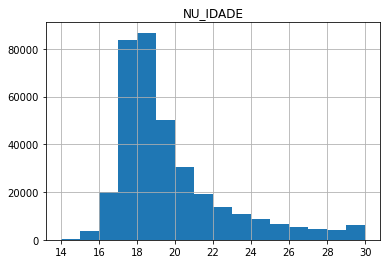

In [125]:
dados.hist("NU_IDADE",bins=16)

Como era de se esperar, a grande maioria dos candidatos tem entre 17 e 19 anos. E a quantidade de candidados cai exponencialmente à medida que a idade aumenta.

Foi plotado também o histograma da nota total dividido por sexo

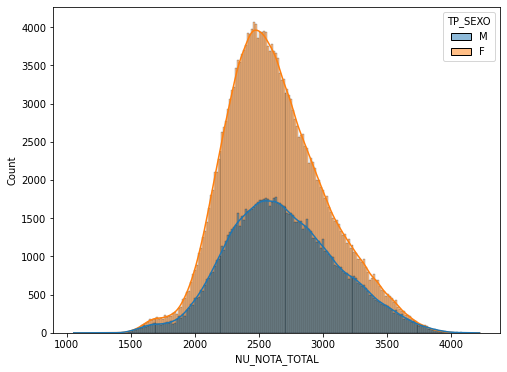

In [ ]:
ax = plt.figure(figsize=(8, 6))
ax = sns.histplot(data=dados, x="NU_NOTA_TOTAL", hue="TP_SEXO", kde=True)

É facil ver que a quantidade de candidatos do sexo feminino é bem superior ao masculino

In [ ]:
dados['TP_SEXO'].value_counts()

F    234478
M    119145
Name: TP_SEXO, dtype: int64

Foi plotado novamente o histograma da nota total dividido por sexo, mas desta vez cada um foi feito separadamente para que a diferença na quantidade não interfira na visualização

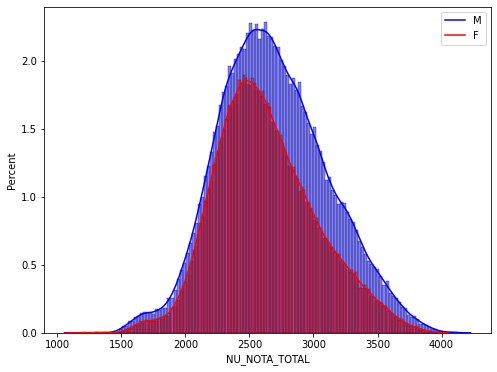

In [126]:
ax = plt.figure(figsize=(8, 6))
ax = hist_masc = sns.histplot(data=dados.query('TP_SEXO=="M"'), x="NU_NOTA_TOTAL", kde=True, stat='percent',color='blue')
ax = hist_fem = sns.histplot(data=dados.query('TP_SEXO=="F"'), x="NU_NOTA_TOTAL", kde=True, stat='percent',color='red')
plt.legend(labels = ['M','F'],loc = 'upper right')

Dados estatísticos das mulheres

In [ ]:
dados.query('TP_SEXO=="F"').describe()

,NU_IDADE,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q005,NU_NOTA_TOTAL
count,234478.000000,234478.000000,234478.000000,234478.000000,234478.000000,234478.000000,234478.000000,234478.000000,234478.000000,234478.000000,234478.000000
mean,19.084024,1.462589,0.108151,471.982609,509.569907,526.580600,510.015204,0.521307,610.224669,3.946515,2628.372989
std,2.855100,0.593193,0.310572,72.761214,76.029434,57.757183,99.546597,0.499547,175.213123,1.410222,395.696476
min,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1062.800000
25%,17.000000,1.000000,0.000000,415.000000,455.200000,493.000000,432.400000,0.000000,520.000000,3.000000,2351.700000
50%,18.000000,1.000000,0.000000,464.200000,513.200000,530.000000,489.300000,1.000000,600.000000,4.000000,2585.300000
75%,20.000000,2.000000,0.000000,523.500000,563.800000,566.000000,572.400000,1.000000,720.000000,5.000000,2875.100000
max,30.000000,3.000000,1.000000,801.100000,812.800000,744.000000,973.400000,1.000000,1000.000000,20.000000,4050.700000


Dados estatísticos dos homens

In [ ]:
dados.query('TP_SEXO=="M"').describe()

,NU_IDADE,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q005,NU_NOTA_TOTAL
count,119145.000000,119145.000000,119145.000000,119145.000000,119145.000000,119145.000000,119145.000000,119145.00000,119145.000000,119145.000000,119145.000000
mean,19.498857,1.474607,0.085702,490.023799,520.471515,526.782509,548.370481,0.43463,597.859751,3.912040,2683.508054
std,3.081521,0.606965,0.279925,77.898683,82.276461,63.276863,114.843580,0.49571,181.725926,1.416444,427.756537
min,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1054.800000
25%,17.000000,1.000000,0.000000,428.700000,462.000000,489.600000,453.100000,0.00000,500.000000,3.000000,2381.800000
50%,18.000000,1.000000,0.000000,485.600000,526.500000,534.000000,534.100000,0.00000,600.000000,4.000000,2654.000000
75%,21.000000,2.000000,0.000000,547.200000,579.600000,571.700000,629.900000,1.00000,700.000000,5.000000,2966.600000
max,30.000000,3.000000,1.000000,860.900000,820.400000,801.700000,985.500000,1.00000,1000.000000,20.000000,4225.000000


Com isto, podemos perceber que as médias são bem próximas. A porcentagem dos homens que ficaram acima da média é maior que das mulheres, enquanto a porcentagem dos que ficaram abaixo é levemente maior.

A seguir foram plotados os histogramas relativos à nota total separados por cor e raça.

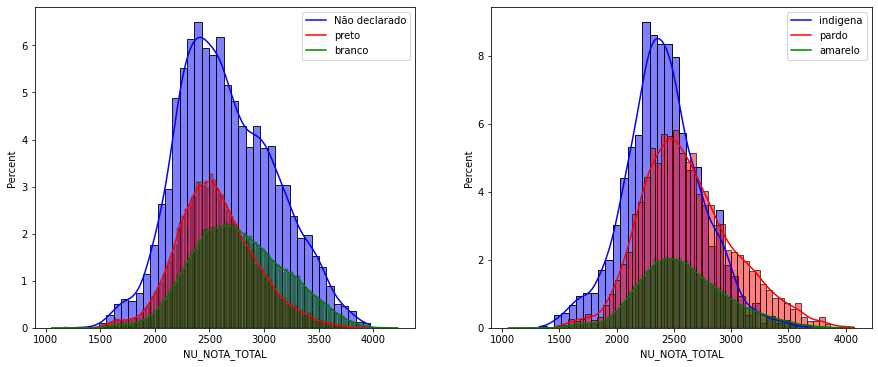

In [ ]:
plt.figure(figsize=(15, 13))
ax1 = plt.subplot(2,2,1)
ax1 = hist0 = sns.histplot(data=dados.query('TP_COR_RACA==0'), x="NU_NOTA_TOTAL", kde=True, stat='percent',color='blue')
ax1 = hist2 = sns.histplot(data=dados.query('TP_COR_RACA==2'), x="NU_NOTA_TOTAL", kde=True, stat='percent',color='red')
ax1 = hist1 = sns.histplot(data=dados.query('TP_COR_RACA==1'), x="NU_NOTA_TOTAL", kde=True, stat='percent',color='green')
ax1 = plt.legend(labels = ['Não declarado','preto','branco'],loc = 'upper right')

ax2 = plt.subplot(2,2,2)
ax2 = hist5 = sns.histplot(data=dados.query('TP_COR_RACA==5'), x="NU_NOTA_TOTAL", kde=True, stat='percent',color='blue')
ax2 = hist4 = sns.histplot(data=dados.query('TP_COR_RACA==4'), x="NU_NOTA_TOTAL", kde=True, stat='percent',color='red')
ax2 = hist3 = sns.histplot(data=dados.query('TP_COR_RACA==3'), x="NU_NOTA_TOTAL", kde=True, stat='percent',color='green')
ax2 = plt.legend(labels = ['indigena','pardo','amarelo'],loc = 'upper right')

Percebe-se que a nota média dos não declarados, pretos, pardos, indigenas e amarelos é aproximadamente 2500 (metade do total). A média dos brancos está um pouco maior. Os que tiveram maior porcentagem acima da média foram os brancos, não declarados e pardos. Os que tiveram maior porcentagem abaixo da média foram os não declarados e indigenas. Os que tiveram maior porcentagem na média foram os não declarados e indigenas

Em seguida foram analisadas as notas de cada área de conhecimento no contexto geral

In [ ]:
dados[notas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,353623.000000,353623.000000,353623.000000,353623.000000,353623.000000
mean,478.061166,513.242949,526.648629,522.938117,606.058599
std,75.017854,78.359481,59.673955,106.504040,177.530135
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.150000,457.400000,492.100000,438.100000,520.000000
50%,470.900000,517.300000,531.300000,502.000000,600.000000
75%,532.000000,569.200000,568.000000,593.900000,720.000000
max,860.900000,820.400000,801.700000,985.500000,1000.000000


Parfa ilustrar estes dados, foram feitos boxplots de cada nota.

In [ ]:
s2 = plt.figure(figsize=(12,8))
s2 = sns.boxplot(x='Q006', y ='NU_NOTA_TOTAL', data = dado

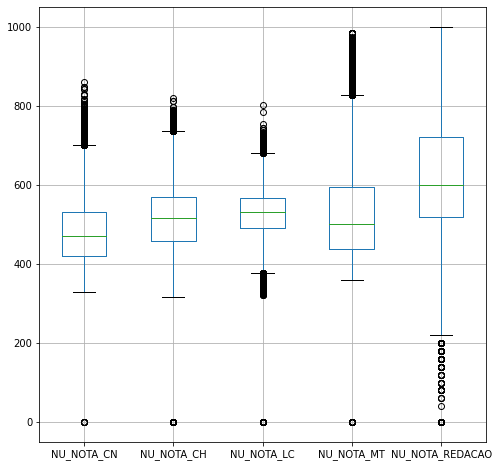

In [ ]:
dados[notas].boxplot(grid=True, figsize= (8,8))

A maior nota de todas foi de redação. Redação também é a maior média e tem a maior quantidade de candidatos acima e abaixo da média. As menores médias são de ciências da natureza.

Abaixo está a relação entre a nota total e a renda total da familia.

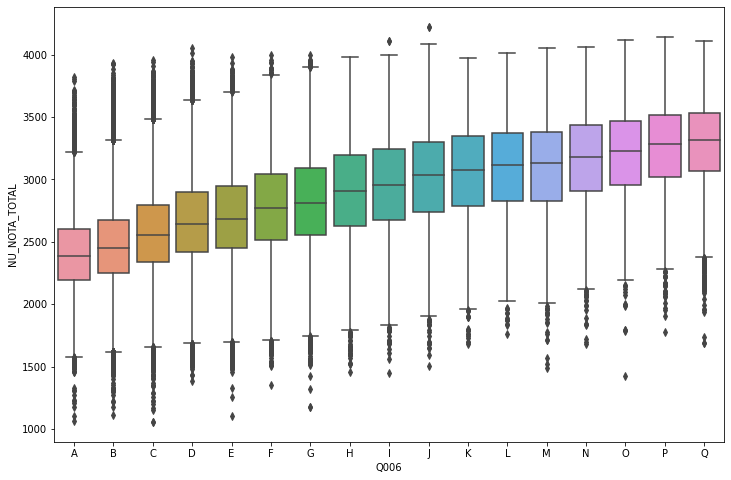

In [142]:
s2 = plt.figure(figsize=(12,8))
s2 = sns.boxplot(x='Q006', y ='NU_NOTA_TOTAL', data = dados, order=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q'])

A relação entre a renda familiar e a nota total é clara. Quanto maior a renda, maior a nota.

Abaixo está a diferença entre os sexos da relação acima.

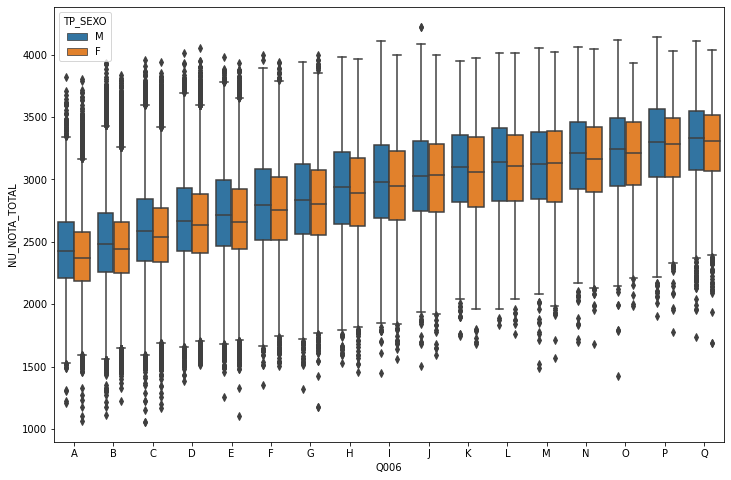

In [148]:
s2 = plt.figure(figsize=(12,8))
s2 = sns.boxplot(x='Q006', y ='NU_NOTA_TOTAL', hue='TP_SEXO', data = dados, order=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q'])

Percebe-se que quanto maior a renda, mais equiparadas estão as notas